---
**This is my final Capstone Project for the Google Data Analytics Professional Certification**

---
**This report is based on Case Study 2: How Can a Wellness Technology Company Play It Smart?**

---

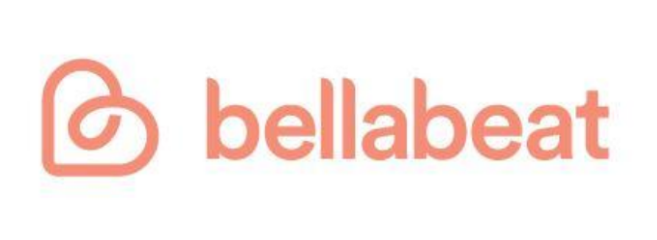

## About the company
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

## Business task
1. Find the most efficient marketing strategy for Bellabeat’s products.

2. Analyze smart device usage data in order to gain insight into how consumers use Bellabeat's smart devices.

3. Select one Bellabeat product to apply these insights to
    - What are some trends in smart device usage?
    - How could these trends apply to Bellabeat customers?
    - How could these trends help influence Bellabeat marketing strategy?

## Preparing Data
### Datasets and Sources
FitBit Fitness Tracker Data (CC0: Public domain)

This [dataset](https://www.kaggle.com/datasets/arashnic/fitbit) is provided by [Möbius](https://www.kaggle.com/arashnic) on Kaggle.

### Loading Packages

In [22]:
library(tidyverse)
library(data.table)


### Importing and Merging Datasets
Click [here](https://www.kaggle.com/datasets/arashnic/fitbit) to view the Datasets used in this project.

In [23]:
# activity_daily contains data on total steps and total distance recorded.
activity_daily_march <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
activity_daily_april <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
activity_daily <- rbind(activity_daily_march, activity_daily_april)

# calories_daily contains data on calories burned per day.
calories_daily <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")

# calories_hourly contains data on calories burned per hour.
calories_hourly_march <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv")
calories_hourly_april <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
calories_hourly <- rbind(calories_hourly_march, calories_hourly_april)

# intensities_daily contains data on daily active minutes and total distance recorded.
intensities_daily <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")

# intensities_hourly contains data on active minutes per hour and average hourly intensity (hourly active minutes/60minutes *100).
intensities_hourly_march <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv")
intensities_hourly_april <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
intensities_hourly <- rbind(intensities_hourly_march, intensities_hourly_april)

# steps_daily contains data on total steps per day.
steps_daily <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")

# steps_hourly contains data on total steps per hour.
steps_hourly_march <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv")
steps_hourly_april <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
steps_hourly <- rbind(steps_hourly_march, steps_hourly_april)

# sleep_daily contains data on minutues asleep vs. minutes in bed
sleep_daily <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
activity_daily <- merge(activity_daily, sleep_daily, by = "Id", all = TRUE)

# weight_log contains data on weight and BMI
weight_log_march <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv")
weight_log_april <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
weight_log <- rbind(weight_log_march, weight_log_april)

### Fixing formats

ActivityHour and ActivityDay columns are of 'character' data type. Converting these columns to appropriate 'dttm' format. Furthermore, creating new date and time columns with 'date' and 'ITime' formats respectively. 

In [24]:
activity_daily$ActivityDate=as.Date(activity_daily$ActivityDate, format="%m/%d/%Y")
activity_daily$SleepDay=as.Date(activity_daily$SleepDay, format="%m/%d/%Y")

calories_daily$ActivityDay=as.Date(calories_daily$ActivityDay, format="%m/%d/%Y")

calories_hourly$ActivityHour <- as.POSIXct(calories_hourly$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")
calories_hourly$time <- as.ITime(calories_hourly$ActivityHour)
calories_hourly$date <- as.Date(calories_hourly$ActivityHour)


intensities_daily$ActivityDay=as.Date(intensities_daily$ActivityDay, format="%m/%d/%Y")

intensities_hourly$ActivityHour = as.POSIXct(intensities_hourly$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")
intensities_hourly$time <- as.ITime(intensities_hourly$ActivityHour)
intensities_hourly$date <- as.Date(intensities_hourly$ActivityHour)


steps_daily$ActivityDay=as.Date(steps_daily$ActivityDay, format="%m/%d/%Y")

steps_hourly$ActivityHour = as.POSIXct(steps_hourly$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")
steps_hourly$time <- as.ITime(steps_hourly$ActivityHour)
steps_hourly$date <- as.Date(steps_hourly$ActivityHour)

weight_log$Date=as.Date(weight_log$Date, format="%m/%d/%Y")





### Overview of the data to be explored and processed

In [25]:
glimpse(activity_daily)
glimpse(calories_daily)
glimpse(calories_hourly)
glimpse(intensities_daily)
glimpse(intensities_hourly)
glimpse(steps_daily)
glimpse(steps_hourly)
glimpse(weight_log)

Rows: 18,200
Columns: 19
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <date> 2016-04-24, 2016-04-24, 2016-04-24, 2016-04-…
$ TotalSteps               <int> 10039, 10039, 10039, 10039, 10039, 10039, 100…
$ TotalDistance            <dbl> 6.41, 6.41, 6.41, 6.41, 6.41, 6.41, 6.41, 6.4…
$ TrackerDistance          <dbl> 6.41, 6.41, 6.41, 6.41, 6.41, 6.41, 6.41, 6.4…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 2.92, 2.92, 2.92, 2.92, 2.92, 2.92, 2.92, 2.9…
$ ModeratelyActiveDistance <dbl> 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.2…
$ LightActiveDistance      <dbl> 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.2…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 3…
$ FairlyActiveMinutes      <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ LightlyActive

### Exploring and summarising the data

In [26]:
# count the number of participants
n_distinct(activity_daily$Id)
n_distinct(calories_daily$Id)
n_distinct(calories_hourly$Id)
n_distinct(intensities_daily$Id)
n_distinct(intensities_hourly$Id)
n_distinct(steps_daily$Id)
n_distinct(steps_hourly$Id)
n_distinct(weight_log$Id)

[1] 35

[1] 33

[1] 35

[1] 33

[1] 35

[1] 33

[1] 35

[1] 13

This information tells us about the number participants in each data frame.

There are only 13 distinct IDs in weight log data set. This shows that participants are not manually recording their weights using the app at periodical time intervals.

Lets have a look at the summary of the data sets:

In [27]:
print("activity_daily")

activity_daily %>%
    select(TotalSteps,
           TotalDistance,
           SedentaryMinutes, Calories) %>%
    summary()

activity_daily %>%
    select(VeryActiveMinutes,
           FairlyActiveMinutes,
           LightlyActiveMinutes) %>%
    summary()

print("sleep_daily")
activity_daily %>%
    select(TotalMinutesAsleep,
           TotalTimeInBed) %>%
    summary()

print("calories_hourly")
calories_hourly %>%
    select(Calories) %>%
    summary()

print("intensities_hourly")
intensities_hourly %>%
    select(TotalIntensity,
           AverageIntensity) %>%
    summary()
    
print("steps_daily")
steps_daily %>%
    select(StepTotal) %>%
    summary()

print("steps_hourly")
steps_hourly %>%
    select(StepTotal)%>%
    summary()

print("weight_log")
weight_log %>%
    select(WeightKg,
           BMI) %>%
    summary()


[1] "activity_daily"


   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 4369   1st Qu.: 2.958   1st Qu.: 657.0   1st Qu.:1788  
 Median : 8232   Median : 5.920   Median : 739.0   Median :2151  
 Mean   : 7935   Mean   : 5.596   Mean   : 805.3   Mean   :2292  
 3rd Qu.:11181   3rd Qu.: 7.840   3rd Qu.: 890.0   3rd Qu.:2800  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:142.0       
 Median :  7.00    Median : 10.00      Median :201.0       
 Mean   : 22.91    Mean   : 16.49      Mean   :197.7       
 3rd Qu.: 35.00    3rd Qu.: 24.00      3rd Qu.:258.0       
 Max.   :210.00    Max.   :660.00      Max.   :720.0       

[1] "sleep_daily"


 TotalMinutesAsleep TotalTimeInBed
 Min.   : 58.0      Min.   : 61   
 1st Qu.:361.0      1st Qu.:402   
 Median :431.0      Median :461   
 Mean   :418.3      Mean   :457   
 3rd Qu.:490.0      3rd Qu.:526   
 Max.   :796.0      Max.   :961   
 NA's   :371        NA's   :371   

[1] "calories_hourly"


    Calories     
 Min.   : 42.00  
 1st Qu.: 62.00  
 Median : 80.00  
 Mean   : 95.76  
 3rd Qu.:106.00  
 Max.   :948.00  

[1] "intensities_hourly"


 TotalIntensity  AverageIntensity 
 Min.   :  0.0   Min.   :0.00000  
 1st Qu.:  0.0   1st Qu.:0.00000  
 Median :  2.0   Median :0.03333  
 Mean   : 11.4   Mean   :0.19008  
 3rd Qu.: 15.0   3rd Qu.:0.25000  
 Max.   :180.0   Max.   :3.00000  

[1] "steps_daily"


   StepTotal    
 Min.   :    0  
 1st Qu.: 3790  
 Median : 7406  
 Mean   : 7638  
 3rd Qu.:10727  
 Max.   :36019  

[1] "steps_hourly"


   StepTotal      
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   20.0  
 Mean   :  302.5  
 3rd Qu.:  322.0  
 Max.   :10565.0  

[1] "weight_log"


    WeightKg          BMI       
 Min.   : 52.6   Min.   :21.45  
 1st Qu.: 61.5   1st Qu.:24.00  
 Median : 62.5   Median :24.39  
 Mean   : 72.5   Mean   :25.37  
 3rd Qu.: 85.3   3rd Qu.:25.59  
 Max.   :133.5   Max.   :47.54  

### Visualizations

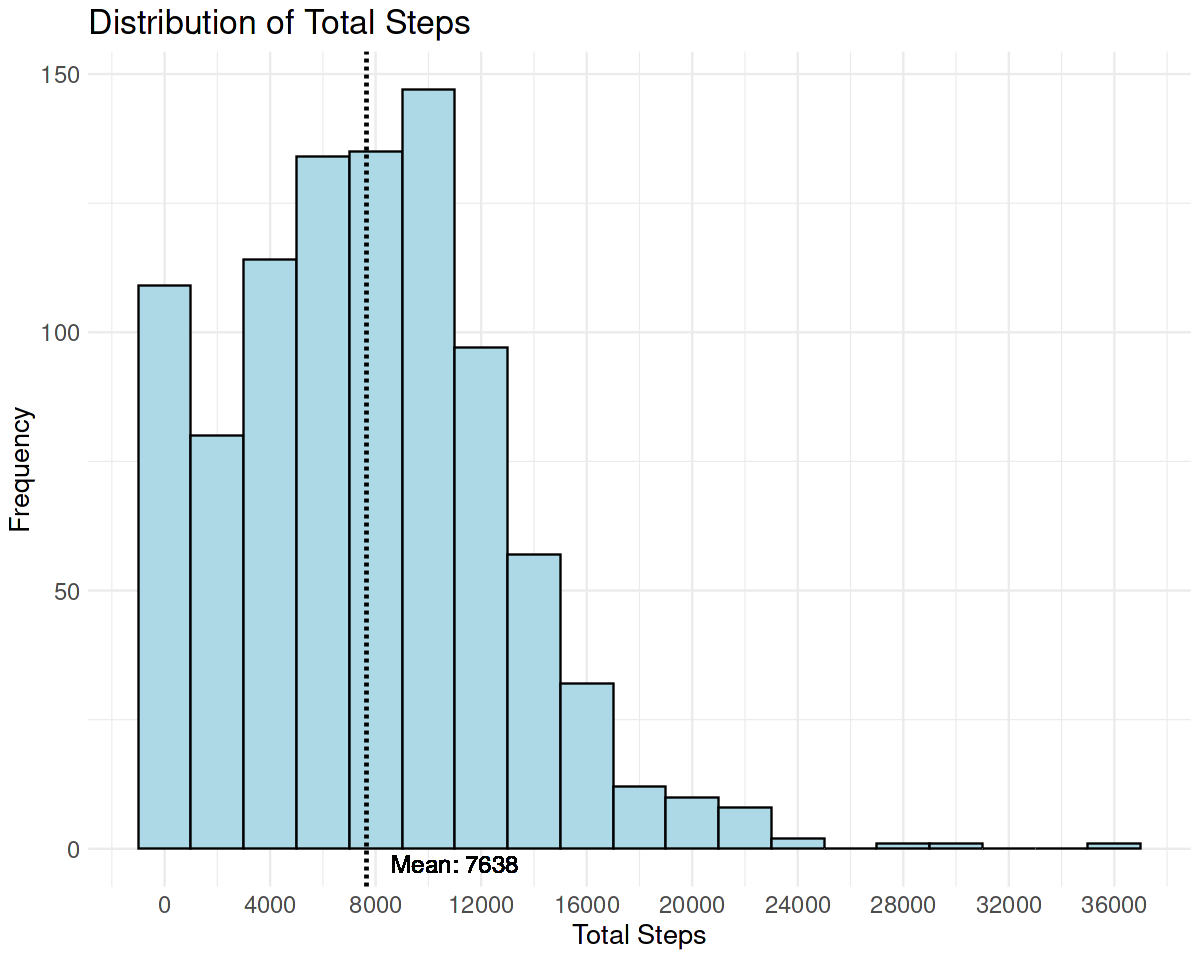

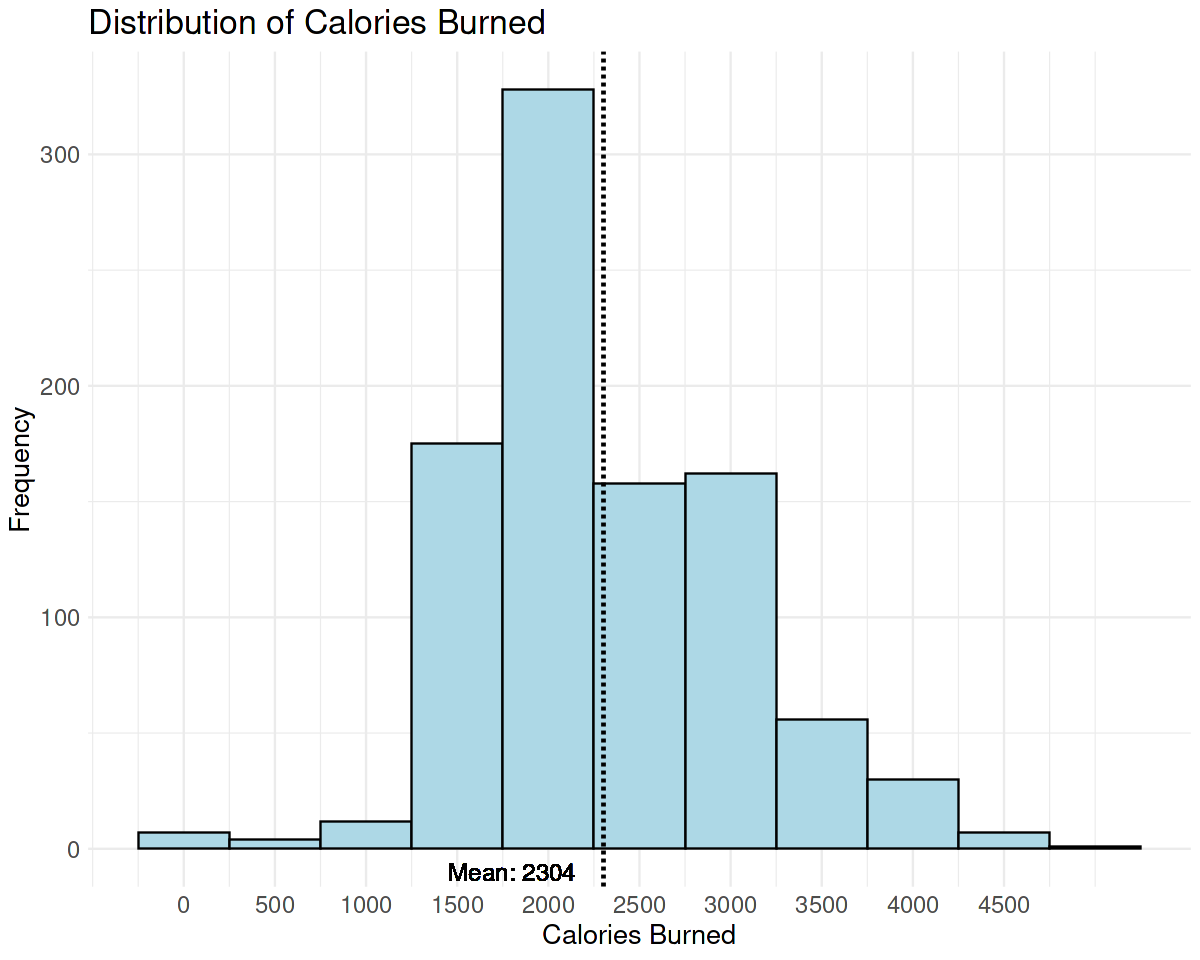

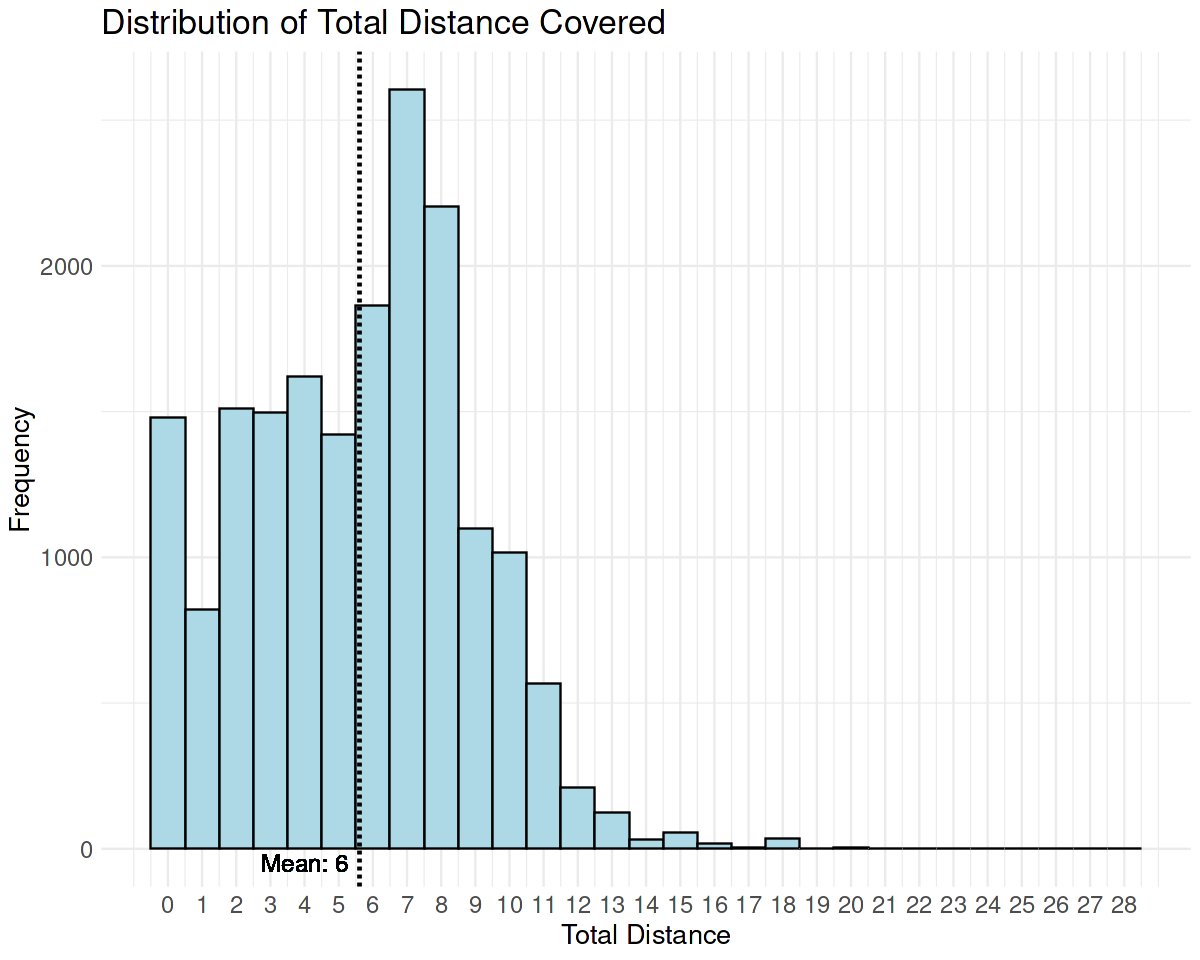

In [28]:
# Setting plot size
options(repr.plot.width = 10, repr.plot.height = 8)

# Calculating mean
mean_StepTotal <- mean(steps_daily$StepTotal)
mean_Calories <- mean(calories_daily$Calories)
mean_TotalDistance <- mean(activity_daily$TotalDistance)

# Plot histogram for Total Steps with mean line and label
ggplot(steps_daily, aes(x = StepTotal)) +
  geom_histogram(binwidth = 2000, fill = 'lightblue', color = 'black') + 
  geom_vline(xintercept = mean_StepTotal, color = "black", linetype = "dashed", size = 1) +  # Add mean line
  geom_text(aes(x = mean_StepTotal - 500, label = paste("Mean:", round(mean_StepTotal, 0))),  # Add label for mean line
            y = -3, x=11000, color = "black", size = 5) +  # Adjust y position and appearance of label
  labs(title = 'Distribution of Total Steps',
       x = 'Total Steps',
       y = 'Frequency') +
  scale_x_continuous(breaks = seq(min(steps_daily$StepTotal), max(steps_daily$StepTotal), by = 4000 )) +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),  # Increase font size of x-axis labels
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 16),
        plot.title = element_text(size = 20))

# Plot histogram for Calories burned with mean line and label
ggplot(calories_daily, aes(x = Calories)) +
  geom_histogram(binwidth = 500, fill = 'lightblue', color = 'black') + 
  geom_vline(xintercept = mean_Calories, color = "black", linetype = "dashed", size = 1) +  # Add mean line
  geom_text(aes(x = mean_Calories - 500, label = paste("Mean:", round(mean_Calories, 0))),  # Add label for mean line
            y = -10, x=1800, color = "black", size = 5) +  # Adjust y position and appearance of label
  labs(title = 'Distribution of Calories Burned',
       x = 'Calories Burned',
       y = 'Frequency') +
  scale_x_continuous(breaks = seq(min(calories_daily$Calories), max(calories_daily$Calories), by = 500)) +  # Adjust X-axis breaks
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),  # Increase font size of x-axis labels
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 16),
        plot.title = element_text(size = 20))

# Plot histogram for Calories burned with mean line and label
ggplot(activity_daily, aes(x =TotalDistance)) +
  geom_histogram(binwidth = 1, fill = 'lightblue', color = 'black') + 
  geom_vline(xintercept = mean_TotalDistance, color = "black", linetype = "dashed", size = 1) +  # Add mean line
  geom_text(aes(x = mean_TotalDistance - 500, label = paste("Mean:", round(mean_TotalDistance, 0))),  # Add label for mean line
            y = -50, x=4, color = "black", size = 5) +  # Adjust y position and appearance of label
  labs(title = 'Distribution of Total Distance Covered',
       x = 'Total Distance',
       y = 'Frequency') +
  scale_x_continuous(breaks = seq(min(activity_daily$TotalDistance), max(activity_daily$TotalDistance), by = 1)) +  # Adjust X-axis breaks
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),  # Increase font size of x-axis labels
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 16),
        plot.title = element_text(size = 20))

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


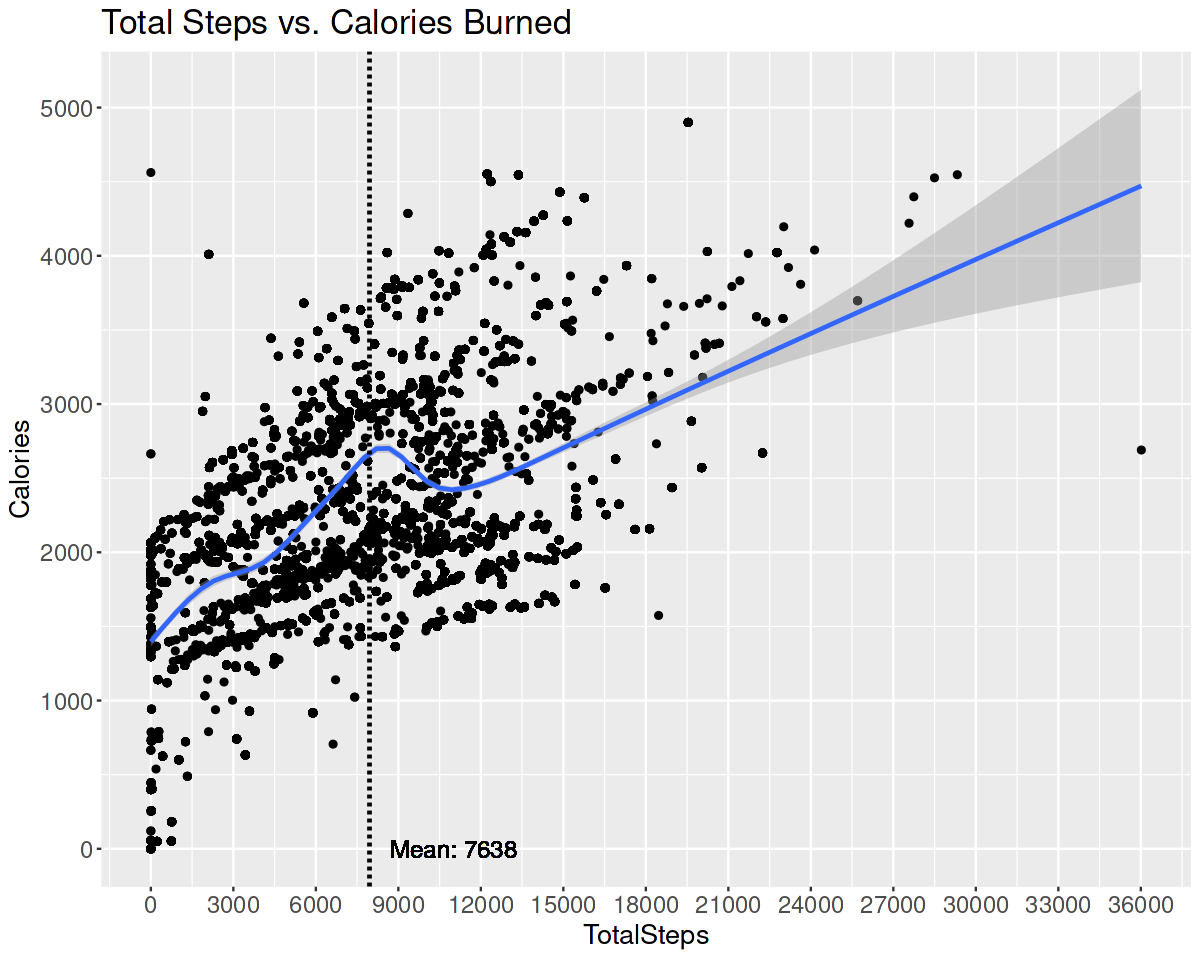

In [58]:
ggplot(data = activity_daily, aes(x = TotalSteps, y = Calories)) +
  geom_point() + 
  geom_smooth() + 
  labs(title = "Total Steps vs. Calories Burned") +
  scale_x_continuous(breaks = seq(min(activity_daily$TotalSteps), max(activity_daily$TotalSteps), by = 3000)) +
  geom_vline(xintercept = mean_ActivityStepTotal, color = "black", linetype = "dashed", size = 1) +
  geom_text(aes(x = mean_StepTotal - 500, label = paste("Mean:", round(mean_StepTotal, 0))),  # Add label for mean line
            y = -3, x=11000, color = "black", size = 5) +
  theme(plot.title = element_text(size = 20),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 16))

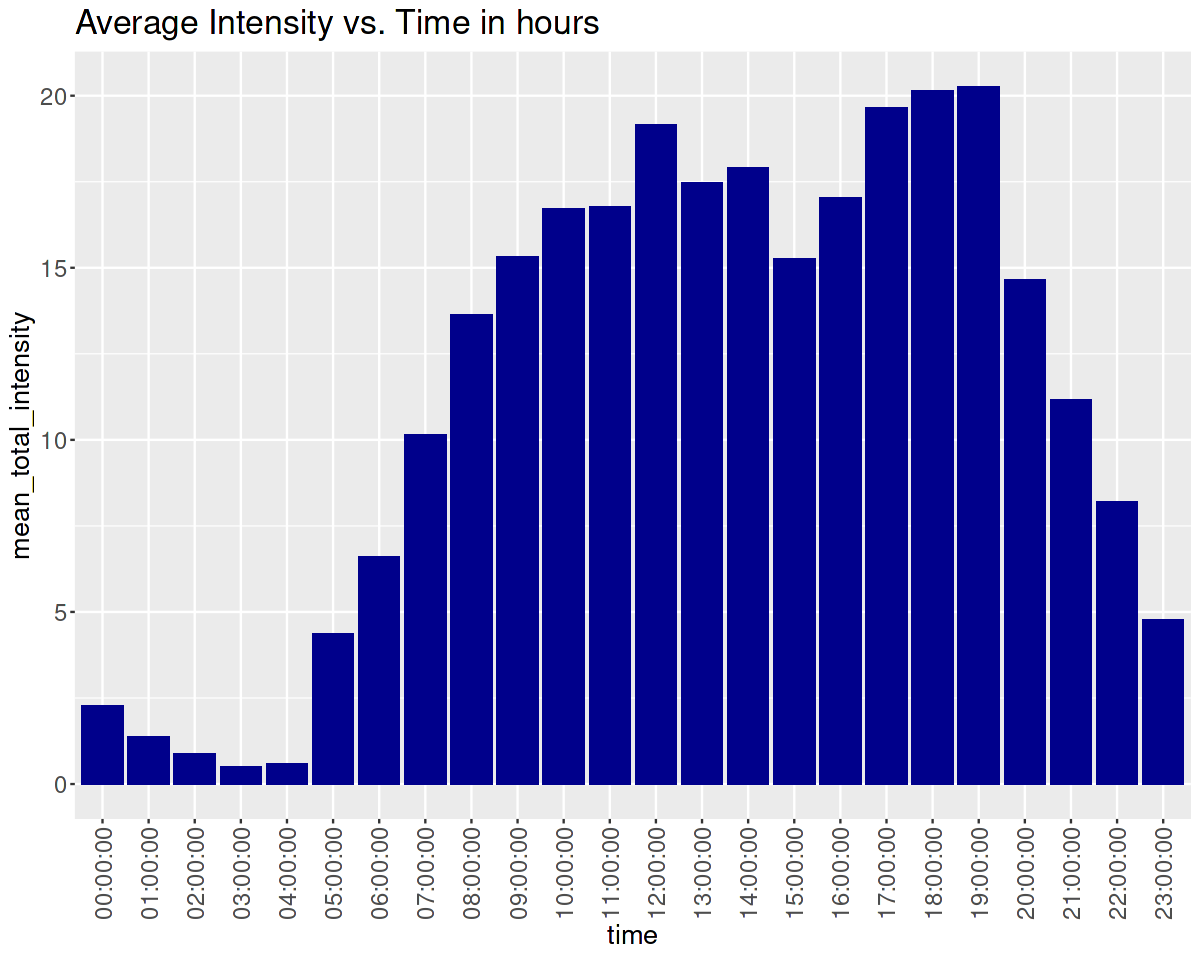

In [31]:
library(ggplot2)
library(dplyr)

# Assuming 'time' is a time variable, convert it to character
intensities_hourly_summary <- intensities_hourly %>%
  drop_na() %>%
  group_by(time) %>%
  summarise(mean_total_intensity = mean(TotalIntensity)) %>%
  mutate(time = as.character(time))

# Plot average intensity over time as a bar chart
ggplot(data = intensities_hourly_summary, aes(x = time, y = mean_total_intensity)) + 
  geom_bar(stat = "identity", fill = 'darkblue') +
  labs(title = "Average Intensity vs. Time in hours") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, size=14),
        plot.title = element_text(size = 20),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 16))


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 371 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 371 rows containing missing values (`geom_point()`).”


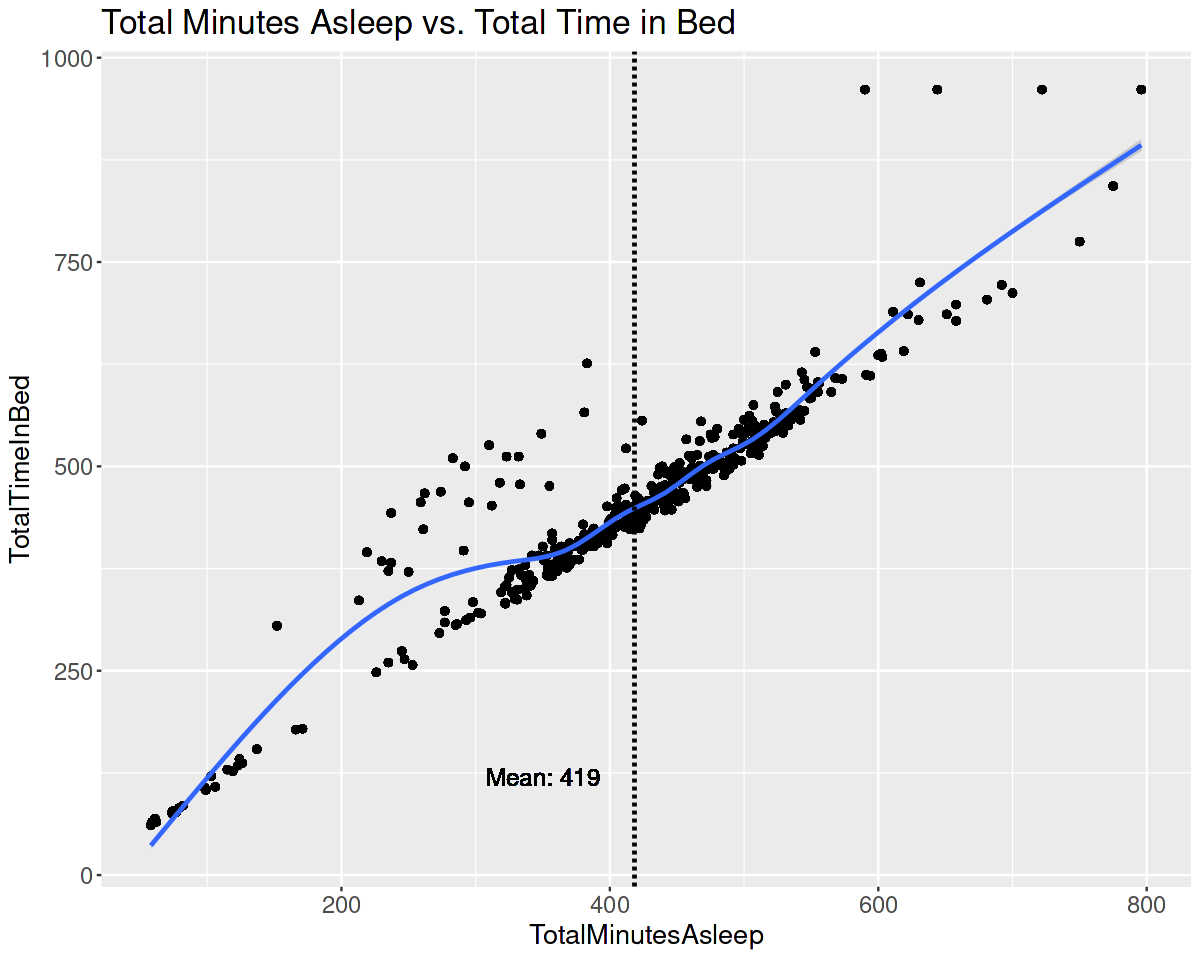

In [35]:
#Total minutes asleep vs. total time in bed
mean_totalminutesasleep <- mean(sleep_daily$TotalMinutesAsleep)

ggplot(data = activity_daily, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) +
  geom_point() + 
  geom_smooth() + 
  labs(title = "Total Minutes Asleep vs. Total Time in Bed") +
  geom_vline(xintercept = 418.30, color = "black", linetype = "dashed", size = 1) +
  geom_text(aes(x = mean_TotalDistance, label = paste("Mean: 419")),
            y = 120, x=350, color = "black", size = 5) +
  theme(plot.title = element_text(size = 20),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 16))

### Recommendations

| **Recommendation** | **Description** |
|----------------|-------|
| **New product to record weights data** | **I noticed that only 13 users out of a total of 35 users recorded their weight data. Bellabeat could design a new product such as a smart weighing machine so that users can easily and consistenly record their weights.**|
| **Sleep reminders as push-up notifications** | **The mean sleep time is approximately 7 hours. Bellabeat could consider sending push notifiactions to it's users in order to remind them about their bedtime. bellabeat's team could add meditations section in their app along with other tools and techniques that could assist users to fall asleep faster.**|
| **Daily steps target reminder along with motivational quotes** | **Research recommends that 8 000 steps per day is the ideal number of steps for a healthy lifestyle. However, on average, the people in this study are below this milestone. It is recommended that the app sends notifications to users with motivational phrases so that they feel motivated to take atleast 8 000 steps every day.**|
| **Exercise tutorials and custom plans integration in App** | **Users should be encouraged to watch and follow free exercise tutorials. They can be given an option to subscribe to custom tailor made exercise plans as well.** |
| **Exercise reminder push-up notifications** | **I found that users on average are most active during 17:00 and 19:00. This could be because they leave their work, walk back to home or maybe head to the gym for training. These are the peak hours in which Bellabeat should bombard its users with exercise-related notifications and motivational quotations.** |
| **Points and daily streak system** | **Users could be able to add their friends and peers in the app and there should be a leaderboard with users ranked as per their points. A streak feature should also be integrated in the app to encourage users to consistenly meet their targets and compete with their peers.** |